<a href="https://colab.research.google.com/github/okiji/stock-price-processing/blob/master/get_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [88.1 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelea

In [0]:
# google driveをマウント
# 実行時に認証URLが出るので、そこのコードを貼り付けて認証する
# ランタイムのリセット毎に必要
from google.colab import drive
drive.mount('./gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./gdrive


In [0]:
# マウントできたか確認
!ls "./gdrive/My Drive/"

'Colab Notebooks'		       stock_value_2020-2020_6577-6555.csv
 stock_value_2018-2020_3687-7751.csv


In [0]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# 情報が無い期間を指定すると空白になるので、学習前にデータの空白がある行は取り除く
# 後ほどデータ収集時に加工するように変更する
start_year = 2018
end_year = 2020

# 銘柄コード　
stock_numbers = [3687, 7751, 4307, 2327, 3915] 

# cookieに阻まれてbs4を使うのは面倒。seleniumを使う
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

browser = webdriver.Chrome("chromedriver", chrome_options = options)

df_summary = pd.DataFrame()

for stock_index, stock_number in enumerate(stock_numbers):
  
  df = pd.DataFrame()
  dates = []
  values = []
  
  for year in range(start_year, end_year + 1):
      url = "https://kabuoji3.com/stock/{}/{}/".format(stock_number, year)
   
      browser.get(url)

      # elementが見つからない時は10s探す
      browser.implicitly_wait(10)

      elems_tr = browser.find_elements_by_tag_name("tr")

      # ヘッダ行は除く
      for i in range(1, len(elems_tr)):
          elems_td = elems_tr[i].find_elements_by_tag_name("td")
          
          # 日時と終値を取得
          dates.append(elems_td[0].text)
          values.append(elems_td[4].text)      

  df["date"] = dates
  df["value_{}".format(stock_number)] = values
  print(df)

  if stock_index == 0:
    df_summary = df
  else:
    df_summary = pd.merge(df_summary, df, on="date")

drive_root_dir="./gdrive/My Drive/"
output_filename = drive_root_dir
output_filename += "stock_value_{}-{}_".format(start_year, end_year)

for i, stock_number in enumerate(stock_numbers):
  if i != len(stock_numbers) - 1:
    output_filename += str(stock_number)
    output_filename += "-"
  else:
    output_filename += str(stock_number)
    output_filename += ".csv"

df_summary.to_csv(output_filename, index=False, header = False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


           date value_3687
0    2018-01-04       6260
1    2018-01-05       6190
2    2018-01-09       6030
3    2018-01-10       6180
4    2018-01-11       6500
..          ...        ...
554  2020-04-15       1100
555  2020-04-16       1100
556  2020-04-17       1073
557  2020-04-20       1081
558  2020-04-21       1041

[559 rows x 2 columns]
           date value_7751
0    2018-01-04       4279
1    2018-01-05       4262
2    2018-01-09       4358
3    2018-01-10       4332
4    2018-01-11       4336
..          ...        ...
554  2020-04-15     2272.5
555  2020-04-16       2218
556  2020-04-17       2260
557  2020-04-20       2243
558  2020-04-21       2202

[559 rows x 2 columns]
           date value_4307
0    2018-01-04       5410
1    2018-01-05       5360
2    2018-01-09       5330
3    2018-01-10       5350
4    2018-01-11       5270
..          ...        ...
554  2020-04-15       2637
555  2020-04-16       2585
556  2020-04-17       2585
557  2020-04-20       2595
558  20

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

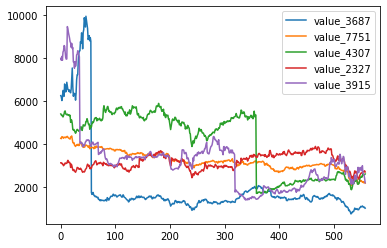

In [0]:
df_plot = df_summary.iloc[:,1:6].astype("float64")
df_plot.plot()

In [0]:
df_summary.dtypes

date          object
value_3687    object
value_7751    object
value_4307    object
value_2327    object
value_3915    object
dtype: object